<a href="https://colab.research.google.com/github/kritika-gupta/IE406-machine-learning/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import csv

## Q1 
Plot θ vs. L(θ), where L(θ) =θ2 . θ varies from -10 to +10 with step size of 0.1. 
Now locate the minimum value of L(θ) with corresponding θ value from plot.


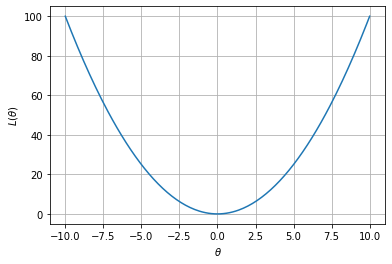

In [ ]:
theta = np.arange(-10, 10+0.1, 0.1)
L_theta = theta**2
plt.figure()
plt.plot(theta, L_theta)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$L(\theta)$")
plt.grid()
plt.show()

### Minimum occurs at theta = 0

## Q2
Plot θ vs. L(θ), where L(θ) =θ12  + θ22. θ1and θ2 vary from -10 to +10 with step size of 0.1 . 
Locate the minimum value of L(θ1, θ2) with corresponding θ1 , θ2 values from the plot.


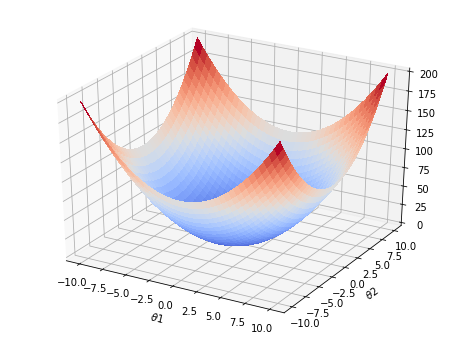

(201, 201) (201, 201) (201, 201)


In [ ]:
theta1 = np.arange(-10, 10+0.1, 0.1)
theta2 = np.arange(-10, 10+0.1, 0.1)

T1, T2 = np.meshgrid(theta1, theta2)

L_ = T1**2 + T2**2
fig = plt.figure(figsize = (8, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T1, T2, L_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel(r"$\theta1$")
plt.ylabel(r"$\theta2$")
plt.grid()
plt.show()

print(L_.shape, T1.shape, T2.shape)

### Minimum occurs at (theta1, theta2) = (0, 0)

## Q3
Plot for L(θ) = i=1myi– 0+ 1.xi2,where m is the number of input examples and x(i), y(i) are the values taken from given data file.
Obtain the minimum value of L(θ) with corresponding θ0, θ1 values from the plot.


In [ ]:
X, Y = [], []
with open ("data_q3.csv") as data_file:
    data = csv.reader(data_file)
    for row in data:
        X.append(row[0])
        Y.append(row[1])

In [ ]:
X = np.array(X, dtype = 'float64')
X = X.reshape((X.shape[0], 1))
Y = np.array(Y, dtype = 'float64')
Y = Y.reshape((Y.shape[0], 1))

In [ ]:
X_scaled = (X - np.mean(X))/(np.std(X))

In [ ]:
# theta0 = np.linspace(-30, 30, 100)
# theta1 = np.linspace(-10, 10, 100)
theta0 = np.arange(-30, 30+0.1, 1)
theta1 = np.arange(-10, 10+0.1, 1)

T0, T1 = np.meshgrid(theta0, theta1)

In [ ]:
L = np.zeros((len(theta0), len(theta1)))

for i, t0 in enumerate(theta0):
    for j, t1 in enumerate(theta1):
        L[i, j] = np.sum((Y - (t0 + t1*X_scaled))**2)
print(L.shape)

(61, 21)


In [ ]:

print(L.shape, T0.shape, T1.shape, X_scaled.shape)

(61, 21) (21, 61) (21, 61) (94, 1)


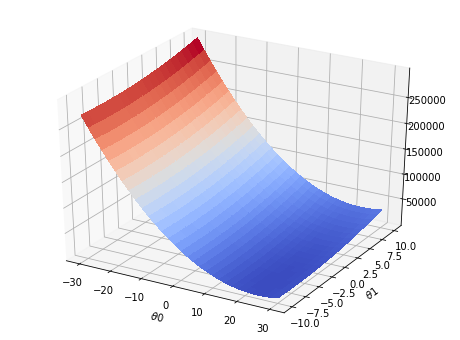

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T0, T1, L.T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel(r"$\theta0$")
plt.ylabel(r"$\theta1$")
plt.grid()
plt.show()

## Q4
Apply Pseudo Inverse (Least Squares (LS)) approach to get θ vector for the cost function (objective function) L(θ) given in example 3.Verify whether θ1 ,θ2 obtained are same as that found in example 3. 


In [ ]:
X_ = np.concatenate((np.ones((X_scaled.shape[0], 1)), X_scaled), axis=1)

In [ ]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_.T, X_)), X_.T), Y)

In [ ]:
theta

array([[23.71808511],
       [-6.86699545]])

## Q5
Calculate the value of L(θ) using the θ vector obtained by Pseudo Inverse (as done in Example 4).  Now  Assume  any  θ vector  (other than the one obtained in Example 4) and compute the new L(θ) value. Comment on why the Pseudo Inverse is also called LS method. 


In [ ]:
theta_temp = np.random.rand(2,1)
L_temp = np.sum((Y - (theta_temp[0] + theta_temp[1]*X_scaled))**2)
L_orig = np.sum((Y - (theta[0] + theta[1]*X_scaled))**2)

In [ ]:
print(L_temp, L_orig)

57140.54589381984 1572.6503668922917
